<a href="https://colab.research.google.com/github/davis689/binder/blob/master/Richard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

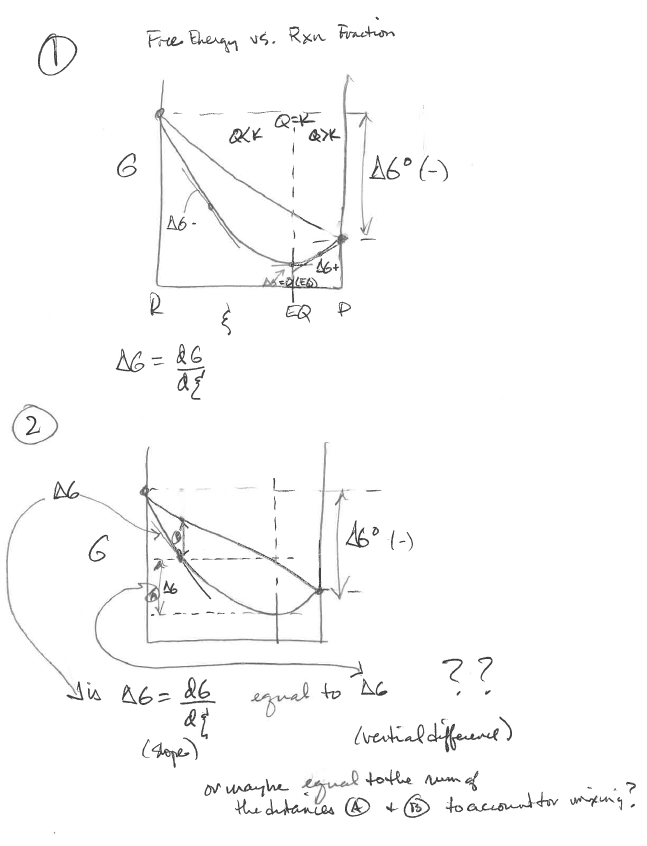

In [1]:
import numpy as np # load the numerical calculation library
import matplotlib.pyplot as plt # load the plotting library
from scipy.constants import R # import the gas constant

In [35]:
Gr=10000 # set the G of the reactants
Gp=7000 # set the G of the products

T=298 # set the temperature

R0=1 # initial amount of reatants
P0=0 # initial amount of products

n_r=1 # stoichiometric coefficient of reactant
n_p=1 # stoichiometric coefficient of product

DG0=n_p*Gp-n_r*Gr # calculate the DeltaGzero between products and reactants

In [36]:
xi=[i for i in np.linspace(-P0/n_p+0.0001,R0/n_r-.0001,10000)] # set up a list of xi values between 0 and 1 not including 0 and 1 to avoid division by zero
                                                                     # actually this works for other xi values too depending on initial amounts and stoichiometry
Gpure=[n_r*(R0-n_r*xi)*Gr+n_p*(P0+n_p*xi)*Gp for xi in xi] # calculate G not including mixing
x_R=[(R0-n_r*xi)/(R0+P0+n_p*xi-n_r*xi) for xi in xi] #mole fraction R
x_P=[(P0+n_p*xi)/(R0+P0+n_p*xi-n_r*xi) for xi in xi] #mole fraction P
Gmix=[R*T*(x_R[i]*np.log(x_R[i])+x_P[i]*np.log(x_P[i])) for i in range(len(xi))] # G of mixing
Grxn=[pure + mix for pure, mix in zip(Gpure, Gmix)] # add Gpure and Gmix together to get Grxn

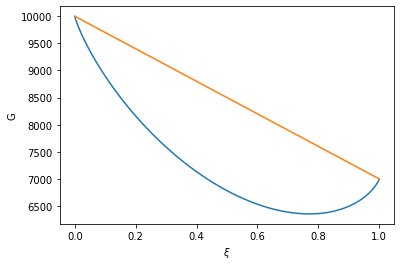

In [37]:
plt.plot(xi,Grxn)
plt.plot(xi,Gpure)
plt.xlabel(r"$\xi$")
plt.ylabel(r"G")
plt.show() # plot Gpure and Grxn

Now if we take the derivative of the $G_{rxn}$ curve, that is the $\Delta G$ for the reaction. We do this numerically below.

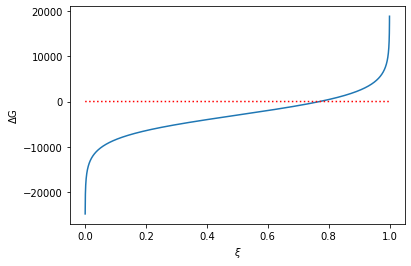

In [42]:
dxi = xi[1]-xi[0]
dGapprox=np.diff(Grxn)/dxi #take derivative to get slope=DG
plt.plot(xi[:-1],dGapprox) #the difference is one shorter so match up with xi but leave off the last one.
plt.plot(xi,np.zeros(len(xi)),color='red',linestyle=':')
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\Delta$G")
plt.show()

This shows the derivative. It is negative for low $\xi$ which corresponds to the part of the G vs $\xi$ chart above to the left of the minimum. It turns positive once we pass the minimum.

Here we look at the question of how the difference from the $G_{rxn}$ to the minimium compares to the $\Delta G$ calculated in the previous plot.

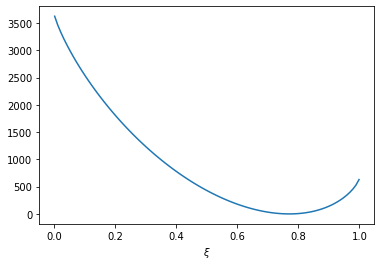

In [117]:
Gproposed=Grxn-min(Grxn) # if DG were the difference between each point and the minimum...
plt.plot(xi,Gproposed)
plt.xlabel(r"$\xi$")
plt.show()

If the proposed relation to $\Delta$G were correct, the last two plots should match. I guess it makes sense that subtracting the minimum would just translate the minimum down to 0 and shift the whole plot down but not change its shape. But I didn't think about that until I saw it plotted.